In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("coffeesales.csv")

In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.tail()

,date,datetime,cash_type,card,money,coffee_name
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte


In [5]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [7]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
df["card"]=df["card"].fillna("Unknown")
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [11]:
df.columns


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

# Best selling coffee

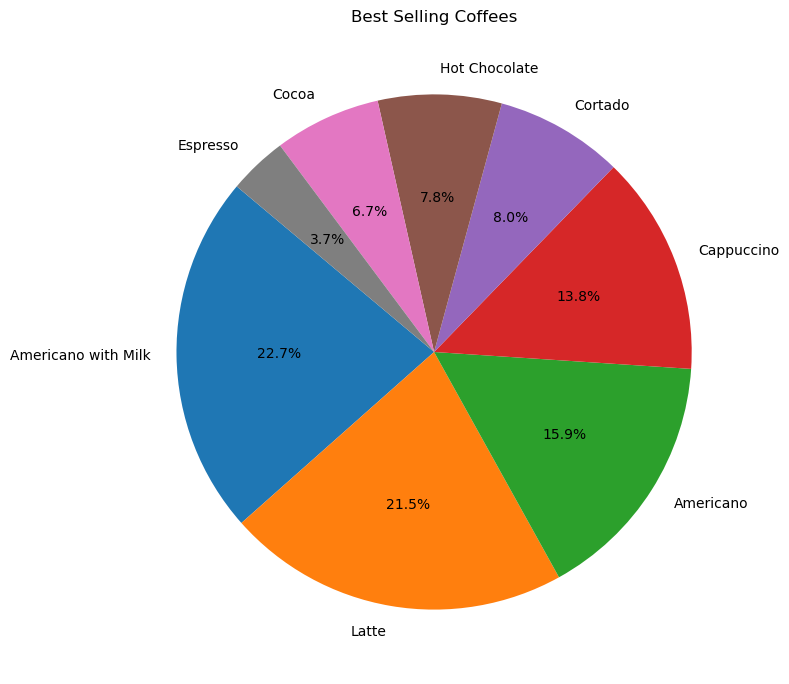

In [20]:
plt.figure(figsize=(8,8))
best_sell=df["coffee_name"].value_counts()
plt.pie(best_sell, 
        labels=best_sell.index, 
        autopct='%1.1f%%', 
        startangle=140
        )

plt.title('Best Selling Coffees')
plt.tight_layout()
plt.show()

# Sales by coffee

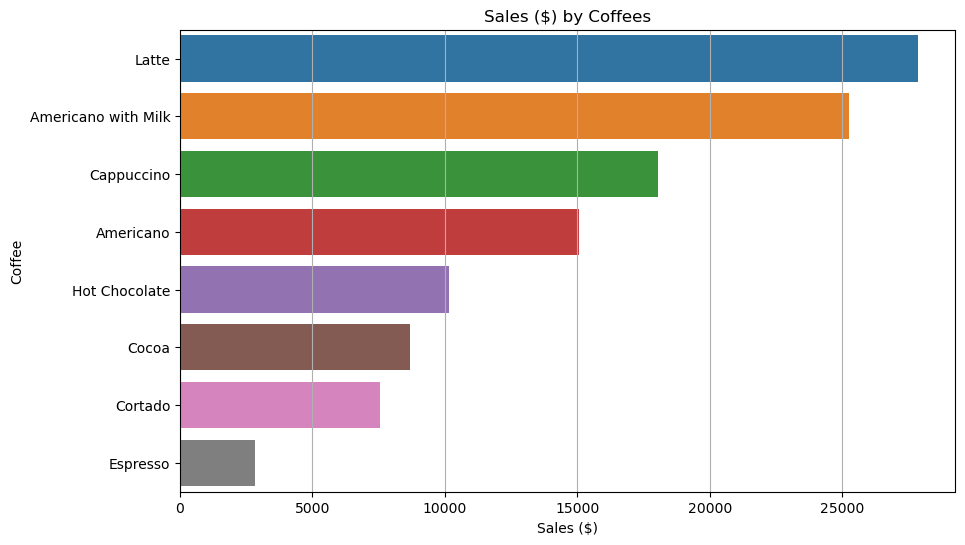

In [17]:
product_filt2=df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sbn.barplot(data=df, x=product_filt2.values, y=product_filt2.index)
plt.title("Sales ($) by Coffees")
plt.xlabel("Sales ($)")
plt.ylabel("Coffee")
plt.grid(axis="x")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3636 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [21]:
df["date"].value_counts()

2024-10-11    26
2025-02-03    25
2024-07-30    24
2025-02-05    24
2024-09-22    24
              ..
2024-08-27     1
2024-05-08     1
2024-07-15     1
2024-04-27     1
2024-11-24     1
Name: date, Length: 381, dtype: int64

# Sales by Months

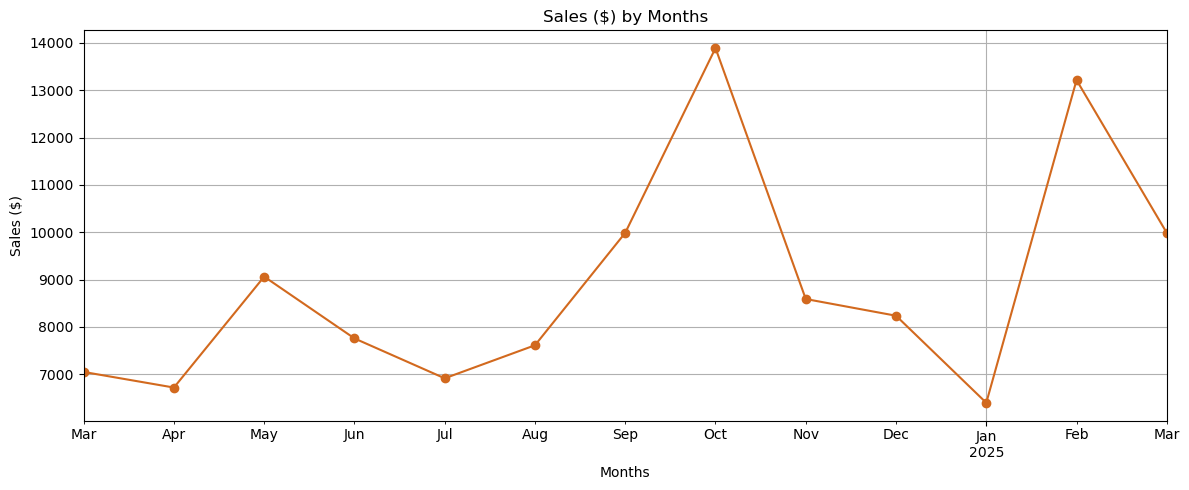

In [24]:
df["date"] = pd.to_datetime(df["date"])
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['money'].sum()
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='#D2691E')
plt.title('Sales ($) by Months')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

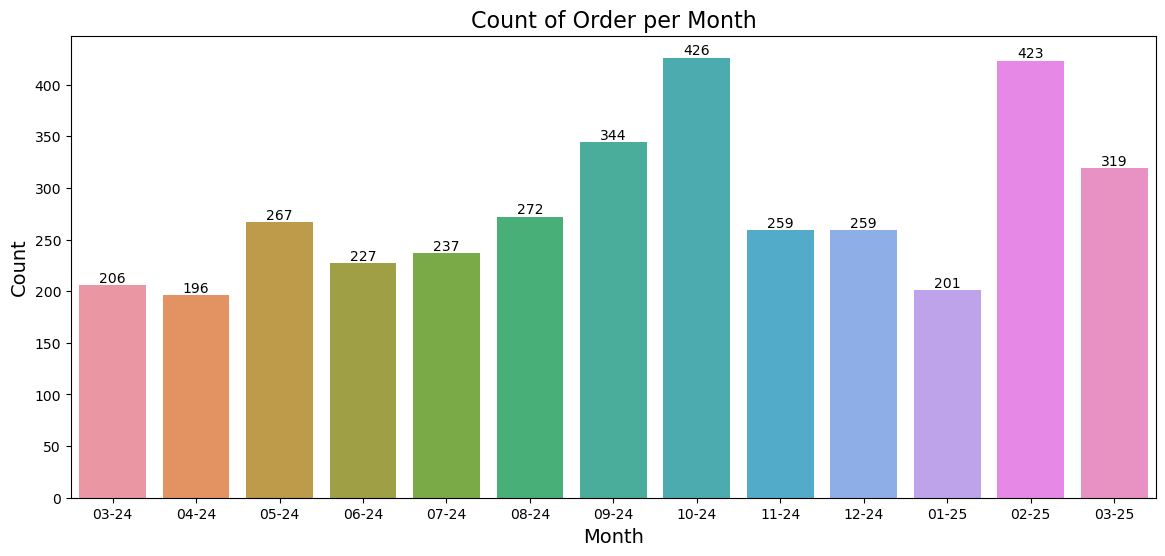

In [30]:
df['year_month']=df['date'].dt.strftime('%m-%y')
plt.figure(figsize=(14, 6))
ax = sbn.countplot(x="year_month", data=df)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Order per Month", fontsize=16)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Hourly sales distribution

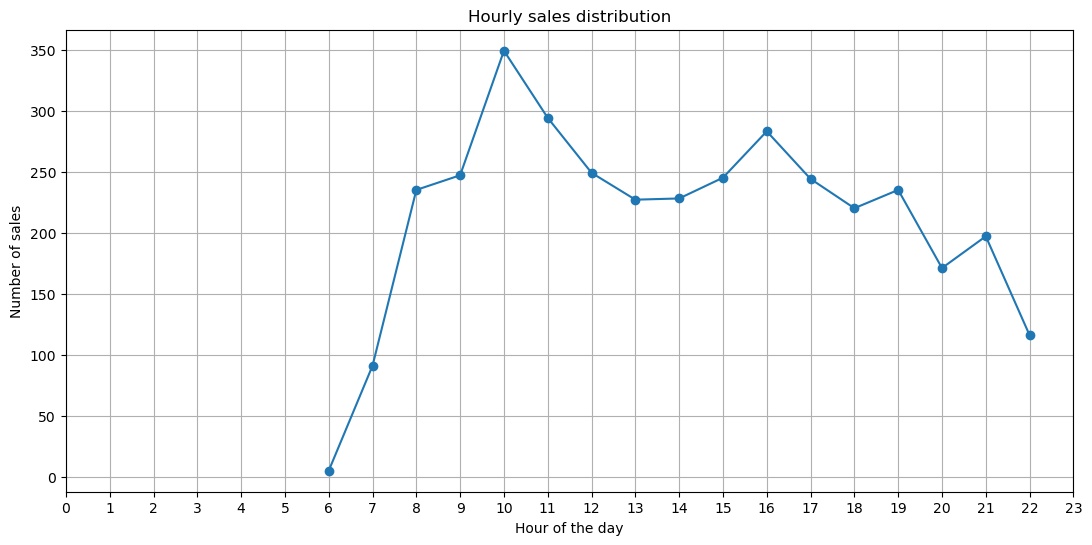

In [36]:
df['datetime']=df['datetime'].astype('datetime64[ns]')
df['hour']=df['datetime'].dt.hour
hourly_Sales=df['hour'].value_counts().sort_index()
plt.figure(figsize=(13,6))
plt.plot(hourly_Sales.index,hourly_Sales.values,marker='o')
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of sales')
plt.title('Hourly sales distribution')
plt.grid(True)
plt.show()

In [25]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Cash Type Preferences

In [26]:
df["cash_type"].value_counts()

card    3547
cash      89
Name: cash_type, dtype: int64

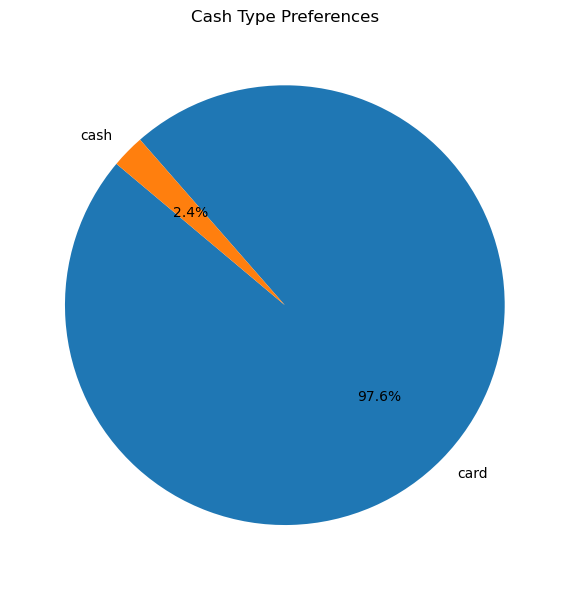

In [28]:
plt.figure(figsize=(6,6))
best_sell=df["cash_type"].value_counts()
plt.pie(best_sell, 
        labels=best_sell.index, 
        autopct='%1.1f%%', 
        startangle=140
        )

plt.title('Cash Type Preferences')
plt.tight_layout()
plt.show()